In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [410]:
% matplotlib inline

In [4]:
datum = pd.read_csv('atusdata/atussum_2013.dat')

In [5]:
datum.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


##Pertinent columns:
###TUFINLWGT - statistical weight of respondent
###TRYHHCHILD - age of youngest child in household
###TEAGE - age of respondent
###TESEX - sex of respondent
###TELFS - working status of respondent
###TRCHILDNUM - number of children in household

In [408]:
age = datum['TEAGE'].to_frame()
sexy_age = datum[['TEAGE', 'TESEX']]
master = datum[['TEAGE', 't010101', 'TESEX', 'TUFINLWGT','t050101', 't120303']]
master.TEAGE.update((master.TEAGE // 10) * 10)

/Users/sorenolegnowicz/cs/python/projects/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [88]:
help(age.plot)

Help on method plot_frame in module pandas.tools.plotting:

plot_frame(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds) method of pandas.core.frame.DataFrame instance
    Make plots of DataFrame using matplotlib / pylab.
    
    Parameters
    ----------
    data : DataFrame
    x : label or position, default None
    y : label or position, default None
        Allows plotting of one column versus another
    kind : str
        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histogram
        - 'box' : boxplot
        - 'kde' : Kernel Density Estimation plot
        - 'density' : same

In [243]:
print(average_minutes(agesleep, '010101'))

520.779678623


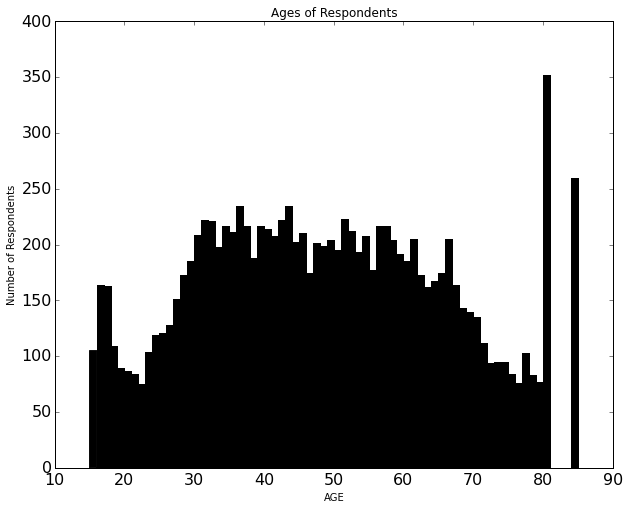

In [49]:
age_plot = age['TEAGE'].plot(kind='hist', bins=70, figsize=(10,8), 
                             title='Ages of Respondents', fontsize=16, color='k')
age_plot.set_xlabel("AGE")
age_plot.set_ylabel("Number of Respondents")

In [57]:
female_age = sexy_age[sexy_age.TESEX == 2]
male_age = sexy_age[sexy_age.TESEX == 1]


Total number of males: 5082


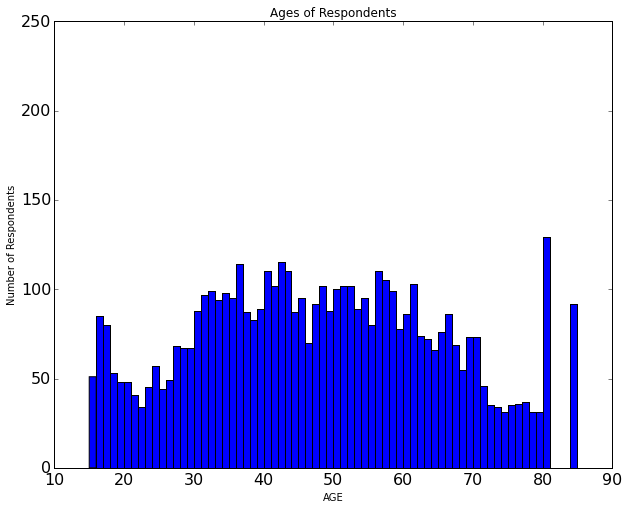

In [356]:
print("Total number of males: {}".format(male_age.shape[0]))
male_plot = male_age['TEAGE'].plot(kind='hist', ylim=(0,250), bins=70, figsize=(10,8), 
                                   title='Ages of Respondents', fontsize=16, color='b')
male_plot.set_xlabel("AGE")
male_plot.set_ylabel("Number of Respondents")
plt.show()

Total number of Females: 6303


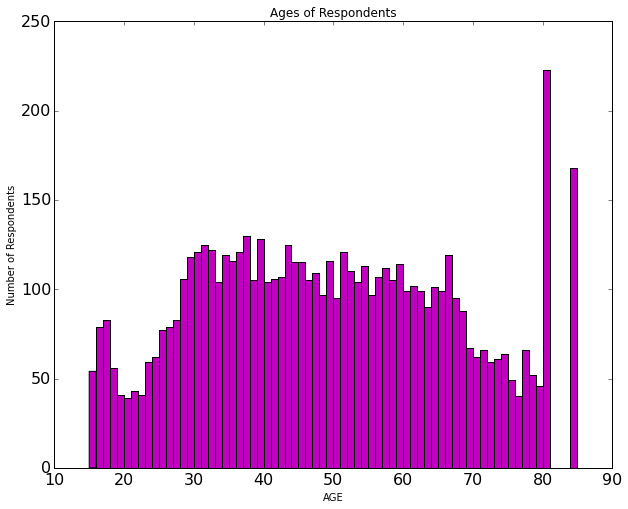

In [355]:
print("Total number of Females: {}".format(female_age.shape[0]))
female_plot = female_age['TEAGE'].plot(kind='hist', bins=70, figsize=(10,8), 
                                       title='Ages of Respondents', fontsize=16, color='m')
female_plot.set_xlabel("AGE")
female_plot.set_ylabel("Number of Respondents")
plt.show()

In [237]:
def average_minutes(data, activity_code):
    activity_col = "t{}".format(activity_code)
    data = data[['TUFINLWGT', activity_col]]
    data = data.rename(columns={"TUFINLWGT": "weight", activity_col: "minutes"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

The above function returns the weighted average.

In [376]:
def all_time(data, desire_name, desire_code, duty):
    data_group = data.groupby(duty)
    data_time = {i: average_minutes(k, desire_code) for i, k in data_group}
    data_df = pd.DataFrame(data_time, index=[desire_name])
    data_df = data_df.T
    return data_df

The above function will return the averages of the given parts of a dataframe using '.groupby'

In [329]:
master_group = master.groupby('TEAGE')


In [382]:
sleep_time = {i: average_minutes(k, '010101') for i, k in master_group}
work_time = {i: average_minutes(k, '050101') for i, k in master_group}
    
sleeper = all_time(master, 'Sleep', '010101', 'TEAGE')
worker = all_time(master, 'Work','050101', 'TEAGE')
sleep_work = sleeper.join(worker)


,Sleep,Work
10,572.874959,51.847874
20,532.986603,218.561638
30,510.443990,251.044129
40,512.147604,247.786269
50,501.802848,233.328555
60,507.882861,128.834603
70,520.346491,37.429498
80,558.167498,16.443226


In [375]:
sleep_df = pd.DataFrame(sleep_time, index=['sleep'])
work_df = pd.DataFrame(work_time, index=['work'])


,10,20,30,40,50,60,70,80
hello,572.874959,532.986603,510.44399,512.147604,501.802848,507.882861,520.346491,558.167498


In [332]:
sleep_df = sleep_df.T
work_df = work_df.T

'sleep_df' is now equivalent to 'all_time(master, '010101', 'TEAGE')'

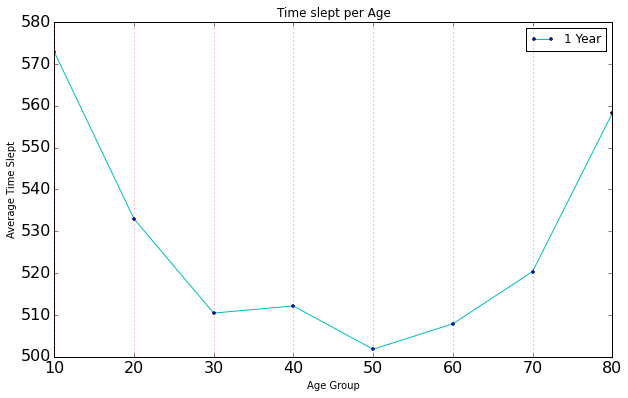

In [387]:

sleep_plot = sleeper.plot(figsize=(10,6), color='c', title="Time slept per Age",
                               marker='o', markerfacecolor='b', markersize=3,
                               fontsize=16)
sleep_plot.set_xlabel("Age Group")
sleep_plot.set_ylabel("Average Time Slept")
sleep_plot.legend(['1 Year'])
sleep_plot.grid(axis='x',color='r')
#decades = ["{}'s".format(i) for i in range(10,81,10)]
#sleep_plot.set_xticks(range(10,81,10), decades)


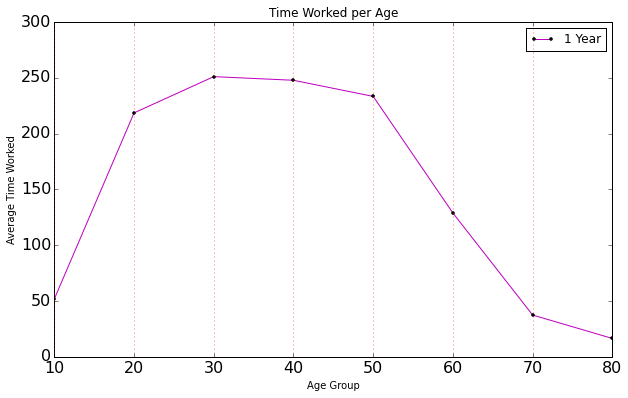

In [391]:
work_plot = worker.plot(figsize=(10,6), color='m', title="Time Worked per Age",
                               marker='o', markerfacecolor='k', markersize=3,
                               fontsize=16)
work_plot.set_xlabel("Age Group")
work_plot.set_ylabel("Average Time Worked")
work_plot.legend(['1 Year'])
work_plot.grid(axis='x',color='r')

The above two plots suggest that Time worked is inversely proportional to Time slept.

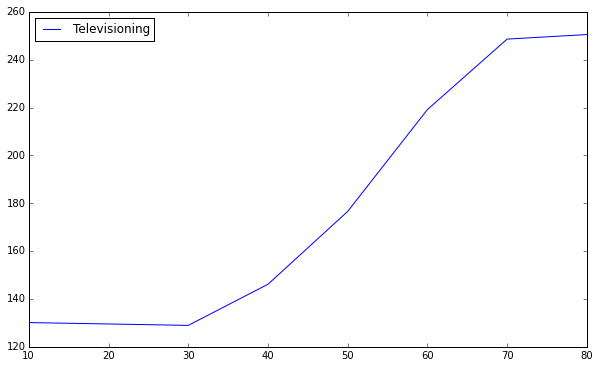

In [398]:
watcher = all_time(master, 'Televisioning', '120303', 'TEAGE')
watcher.plot(figsize=(10,6))

Televsion usage increases with age. Why?

In [403]:
def activity_columns(data, activity_code):
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

In [411]:
exercise_list = datum[activity_columns(datum, '1301')]

In [440]:
e_df = exercise_list.sum(axis=1).to_frame(name='exercise')
deef = master.append(e_df)
derf = deef.exercise.dropna()
derf

0          0
1          0
2        260
3          0
4         60
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18        60
19         0
20        30
21         0
22         0
23         0
24         0
25       120
26         0
27         0
28         0
29         0
        ... 
11355    315
11356     30
11357      0
11358      0
11359      0
11360      0
11361      0
11362      0
11363      0
11364      0
11365      0
11366      0
11367      0
11368      0
11369      0
11370      0
11371      0
11372      0
11373      0
11374      0
11375      0
11376      0
11377      0
11378      0
11379      0
11380      0
11381      0
11382      0
11383      0
11384      0
Name: exercise, dtype: float64

In [432]:
doop = master.groupby('TEAGE')

       TEAGE  t010101  TESEX        TUFINLWGT  t050101  t120303
39        10      610      1   7325390.733778        0      330
49        10      480      1  17284603.689761        0      165
61        10      450      2  23220400.569550        0      125
88        10      480      1  13186606.269365        0        0
95        10      465      2  23498429.630321        0        0
126       10      520      2   5111724.936207        0      385
127       10      555      1  18246566.290865        0        0
136       10      455      2  26050136.903249        0      120
156       10      470      1  12032854.019376      409      200
168       10      690      1   9776548.777139        0      570
176       10      810      2  12258183.437851        0      590
182       10      645      2  14853183.882684        0       60
188       10      600      1   7930671.840137        0        0
192       10      590      1  15331577.262264        0       60
220       10      810      1   3747644.3